In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cmath

# Probe Data

In [2]:
probe_data = pd.read_csv('../Collaboration Data 10_5_2022/Pulse Data 10_5_2022/Probe_ETemporal.dat', header=None, sep=' ')
display(probe_data)

,0,1,2,3,4
0,-271.700000,5.669956e-06,14.338298,0.000072,0.000200
1,-269.577344,7.490865e-06,14.244554,0.000104,0.000221
2,-267.454687,8.215225e-06,14.114551,0.000139,0.000216
3,-265.332031,8.256109e-06,13.947087,0.000173,0.000190
4,-263.209375,8.130241e-06,13.752950,0.000205,0.000152
...,...,...,...,...,...
251,261.086719,1.933412e-08,7.940614,0.000006,0.000011
252,263.209375,1.084391e-07,8.155911,0.000007,0.000029
253,265.332031,5.624846e-07,8.188966,0.000014,0.000066
254,267.454687,1.748130e-06,8.167591,0.000028,0.000115


# Theoretical and Experimental Data 45 deg

## Time and Delay time Data

In [71]:

time_data = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/Time.txt", header=None, sep='\t')
delaytime_data = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/Time_Delay.txt", header=None, sep='\t')
display(time_data)
display(delaytime_data)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,-801.025877,-796.980292,-792.934707,-788.889121,-784.843536,-780.797951,-776.752366,-772.70678,-768.661195,-764.61561,...,461.196717,465.242302,469.287888,473.333473,477.379058,481.424643,485.470229,489.515814,493.561399,497.606984


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,53.33328,53.13328,52.93328,52.733281,52.533281,52.333281,52.133281,51.933281,51.733282,51.533282,...,-24.866642,-25.066642,-25.266641,-25.466641,-25.666641,-25.866641,-26.066641,-26.26664,-26.46664,-26.66664


In [72]:
# theory_df = pd.read_csv('../more_delay/MgO_moredelay.csv', header=None)
theory_df = pd.read_csv('./I_0/datafile_high_intensity.csv', header=None)
theory_df01 = pd.read_csv('./I_0/kx_0_ky_1/datafile.csv', header=None)
theory_df02 = pd.read_csv('./I_0/kx_0_ky_2/datafile.csv', header=None)
theory_df03 = pd.read_csv('./I_0/kx_0_ky_3/datafile.csv', header=None)
theory_df04 = pd.read_csv('./I_0/kx_0_ky_4/datafile.csv', header=None)
theory_df05 = pd.read_csv('./I_0/kx_0_ky_5/datafile.csv', header=None)
# theory_df10 = pd.read_csv('./I_0/kx_1_ky_0/datafile.csv', header=None)
theory_df20 = pd.read_csv('./I_0/kx_2_ky_0/datafile.csv', header=None)
theory_df30 = pd.read_csv('./I_0/kx_3_ky_0/datafile.csv', header=None)
theory_df40 = pd.read_csv('./I_0/kx_4_ky_0/datafile.csv', header=None)
theory_df50 = pd.read_csv('./I_0/kx_5_ky_0/datafile.csv', header=None)
theory_df11 = pd.read_csv('./I_0/kx_1_ky_1/datafile.csv', header=None)
theory_df22 = pd.read_csv('./I_0/kx_2_ky_2/datafile.csv', header=None)
theory_df33 = pd.read_csv('./I_0/kx_3_ky_3/datafile.csv', header=None)
theory_df44 = pd.read_csv('./I_0/kx_4_ky_4/datafile.csv', header=None)
theory_df55 = pd.read_csv('./I_0/kx_5_ky_5/datafile.csv', header=None)
display(theory_df.shape)
display(theory_df01.shape)
display(theory_df02.shape)
display(theory_df03.shape)
display(theory_df04.shape)
display(theory_df05.shape)
display(theory_df20.shape)
display(theory_df30.shape)
display(theory_df40.shape)
display(theory_df50.shape)
display(theory_df11.shape)
display(theory_df22.shape)
display(theory_df33.shape)
display(theory_df44.shape)
display(theory_df55.shape)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

In [73]:
print(len(theory_df.axes[0]))

301


In [74]:
def convert_to_complex(df, i, j):
    return complex((df[j][i][:-2] + 'j').replace("*^","e"))

In [75]:
theory_data = np.zeros((len(theory_df.axes[0]), len(theory_df.axes[1])), dtype=complex)
for i in range(len(theory_df.axes[0])):
    theory_data[i][0] = theory_df[0][i]
    for j in range(1, len(theory_df.axes[1])):
        theory_data[i][j] = convert_to_complex(theory_df, i, j)
        # theory_data[i][j] = (convert_to_complex(theory_df, i, j)
        # + convert_to_complex(theory_df01, i, j) + convert_to_complex(theory_df02, i, j) + convert_to_complex(theory_df03, i, j) 
        # + convert_to_complex(theory_df04, i, j) + convert_to_complex(theory_df05, i, j) + convert_to_complex(theory_df20, i, j) 
        # + convert_to_complex(theory_df30, i, j) + convert_to_complex(theory_df40, i, j) + convert_to_complex(theory_df50, i, j) 
        # + convert_to_complex(theory_df11, i, j) + convert_to_complex(theory_df22, i, j) + convert_to_complex(theory_df33, i, j) 
        # + convert_to_complex(theory_df44, i, j) + convert_to_complex(theory_df55, i, j))

w0 = 2.35
e_data = 1j*w0*theory_data[:, 1:]

In [168]:
# np.savetxt('E_field_data.csv', e_data, delimiter=',')

In [76]:
abs_data = np.zeros((len(theory_df.axes[0]), len(theory_df.axes[1]-1)))
arg_data = np.zeros((len(theory_df.axes[0]), len(theory_df.axes[1]-1)))
for i in range(len(theory_df.axes[0])):
    for j in range(len(theory_df.axes[1])-1):
        (abs_data[i,j], arg_data[i,j]) = cmath.polar(e_data[i,j]) 

In [77]:
def max_E_index(i):
    return max(range(len(abs_data[:,i])), key = abs_data[:,i].__getitem__)

## Intensity Data

In [78]:
E_data1_45 = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/E_t_Amp_Avg.txt", header=None, sep='\t')
display(E_data1_45)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,697.649599,617.843719,516.262331,435.867470,384.078003,347.913588,383.179514,468.293695,573.202544,669.225789,...,1350.000142,1456.518575,1537.206886,1595.730369,1633.837388,1653.406542,1657.102578,1650.849940,1648.317718,1661.189842
1,601.895814,566.245857,518.220281,464.532441,435.909556,488.764853,563.284877,620.405436,645.675964,640.378591,...,1406.340615,1519.469134,1590.822046,1627.878162,1643.719948,1654.152284,1675.114159,1719.244686,1790.617507,1879.848704
2,738.291050,618.534069,488.567079,445.732611,489.741341,545.907614,614.616304,667.711877,678.112465,672.086529,...,841.765828,975.464064,1097.203201,1212.282317,1310.017415,1386.951144,1449.922389,1508.319888,1570.962903,1643.409291
3,694.835388,662.032858,643.421795,653.289580,688.001732,707.967049,711.904246,734.066199,759.523546,745.900722,...,1170.621731,1225.285529,1241.154307,1243.289208,1257.335975,1297.795270,1349.587602,1377.706979,1373.683341,1350.786169
4,658.224816,580.341559,517.167586,516.502117,558.019405,586.133654,599.434895,610.274008,628.020371,646.512541,...,890.314668,927.640490,906.103321,844.788188,785.792851,752.224797,735.045377,718.955843,692.873681,664.499842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,649.104802,687.977087,716.992355,735.372993,753.323712,770.387637,782.710507,787.985607,780.986322,763.447570,...,927.414571,866.334624,837.379476,828.005740,826.840950,825.728568,820.467694,916.450823,1009.321910,1085.627001
397,753.775456,778.832828,776.922239,767.123848,768.026547,765.980968,755.545068,736.279441,728.137002,748.193731,...,1617.222403,1707.600026,1805.041331,1892.533042,1966.563642,2028.609612,2081.548308,2127.076390,2164.716079,2191.368693
398,651.140509,663.227832,741.079650,833.763376,917.264166,980.944634,1016.557913,1016.098550,979.805651,916.874462,...,1999.821337,2087.019434,2168.437117,2242.080124,2306.403247,2361.271377,2408.929665,2453.780242,2500.298046,2549.255200
399,889.108707,943.693449,983.385349,1008.669401,1035.248513,1059.779003,1066.848865,1052.396052,1017.244431,968.627269,...,2521.742959,2615.840017,2685.980081,2733.240225,2759.442923,2766.622822,2756.180368,2727.678852,2678.049397,2602.242338


In [79]:
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
print(max(range(len(E_data_delay)), key = E_data_delay.__getitem__))

summed_abs_data = np.zeros(len(theory_df.axes[1])-1)
for i in range(len(theory_df.axes[1])-1):
    summed_abs_data[i] = np.sum(abs_data[:,i])

print(max(range(len(summed_abs_data)), key = summed_abs_data.__getitem__))

170
3


In [13]:
print(delaytime_data.values[:,267])
print(np.arange(30,-31,-1)[30])

[-0.066667]
0


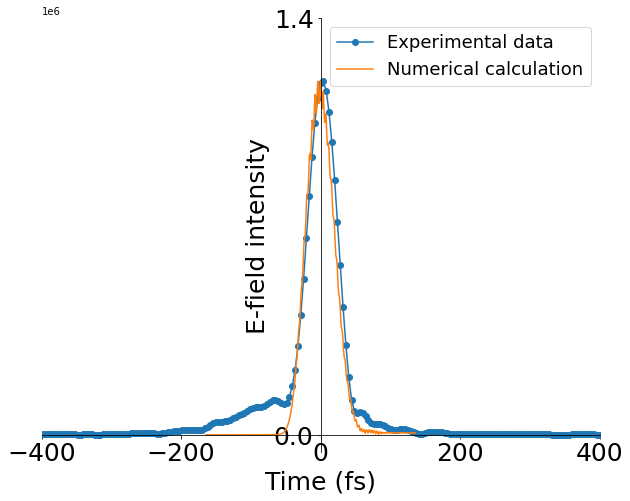

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


delay_index = 267 # Index where time_delay is near 0
theory_delay_index = 50
correction_factor = max([E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))])/max(abs_data[:,theory_delay_index])

plt.plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))], '-o')
plt.plot(theory_data[:,0].real - theory_data[:,0].real[max_E_index(theory_delay_index)], correction_factor*abs_data[:,theory_delay_index]) 
#Maxinmum value of E shifted to t=0
plt.legend(['Experimental data', 'Numerical calculation'],fontsize=18)
plt.xlabel("Time (fs)", fontsize=25)
plt.ylabel("E-field intensity", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([0, 1.4*(10**6)])
plt.xlim([-400,400])
plt.show()

In [28]:
# # print(np.arange(-150,150, 1)[100:701])
# summed_E_data_10 = np.zeros(len(theory_df.axes[1])-1)
# for i in range(len(theory_df.axes[1])-1):
#     summed_E_data_10[i] = np.sum(abs_data[100:701,i])

# # print(max(range(len(summed_E_data)), key = summed_E_data.__getitem__))
# # print(summed_E_data[19])
# # print(np.arange(210,-200,-10)[19])
# # print(summed_E_data[20])

In [81]:
def correction_factor(theory_data, exp_data):
    return np.mean(exp_data)/np.mean(theory_data)

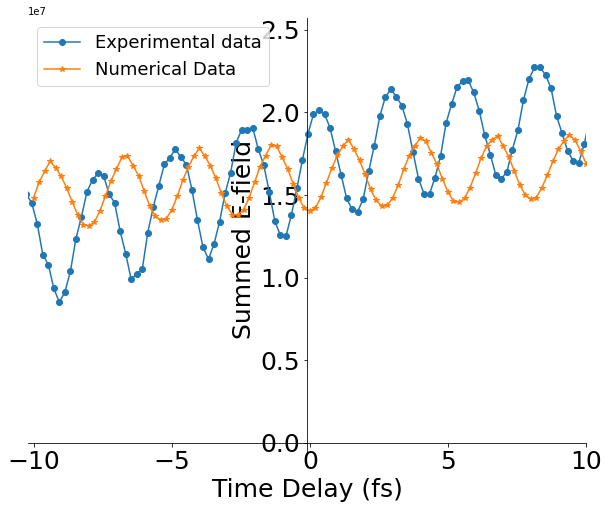

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs_data, E_data_delay)*summed_abs_data,"-*")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.legend(['Experimental data', 'Numerical Data'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

## Phase Data

In [83]:
phase_data1_45 = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/E_t_Phase_Avg.txt", header=None, sep='\t')
display(phase_data1_45)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,4.841584,4.890753,4.970150,5.019605,5.118449,5.216049,5.439065,5.340410,5.278911,5.327447,...,12.398283,12.566238,12.748619,12.943448,13.150333,13.369252,13.600892,13.850375,14.119608,14.384484
1,-0.148239,-0.194996,-0.202665,-0.082619,0.089137,0.139359,0.203582,0.268221,0.372152,0.543262,...,8.763271,8.924777,9.090705,9.270876,9.470527,9.690989,9.930632,10.183464,10.433775,10.661044
2,3.588963,3.523746,3.492707,3.692107,3.933738,4.211403,4.558374,4.722541,4.810278,4.876170,...,3.314977,3.425332,3.596544,3.779993,3.934587,4.075551,4.213589,4.350507,4.486045,4.618184
3,12.173181,12.211591,12.296403,12.302655,12.231121,12.242935,12.332409,12.168098,12.185019,12.243777,...,2.158649,2.225566,2.330700,2.481583,2.676422,2.911378,3.074573,3.166492,3.232395,3.295408
4,16.494421,16.484357,16.421835,16.200284,16.204162,16.283988,16.383824,16.478386,16.552826,16.607546,...,1.684194,1.694519,1.733648,1.833524,2.019538,2.175284,2.296397,2.360089,2.375085,2.123306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,6.743724,6.834429,6.889913,6.952439,7.065999,7.091291,7.061026,7.004198,6.959233,6.929459,...,7.652756,7.637673,7.667353,7.697476,7.700534,7.700331,7.778312,7.648768,7.612054,7.610226
397,1.405209,1.406104,1.427357,1.506583,1.527720,1.488123,1.444950,1.478813,1.674894,1.743755,...,2.604190,2.730580,2.793293,2.843611,2.896935,2.955527,3.016485,3.075532,3.129563,3.176134
398,4.389503,4.572239,4.612939,4.572377,4.485291,4.365735,4.244009,4.135870,4.043086,3.967729,...,-1.633881,-1.623236,-1.596991,-1.558765,-1.511449,-1.456683,-1.395211,-1.327879,-1.256989,-1.187084
399,4.317672,4.192745,4.073438,3.997938,4.009091,3.916573,3.805940,3.710167,3.639558,3.598629,...,-2.922530,-2.933313,-2.928566,-2.910563,-2.881581,-2.843960,-2.800293,-2.753396,-2.705651,-2.658038


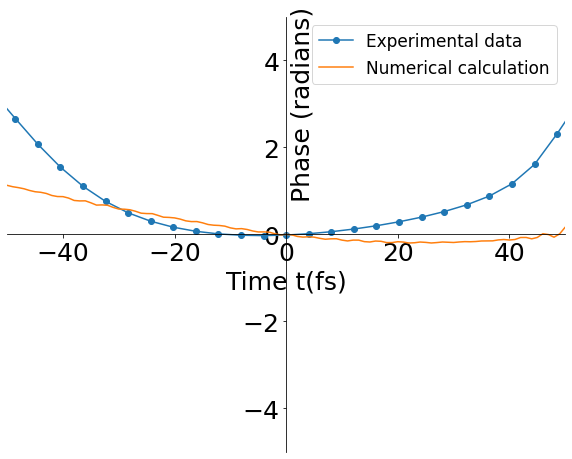

In [84]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = probe_data[:][0]
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.unwrap(probe_data[:][2])
delay_index = 267
theory_delay_index = 50

x = theory_data[:,0].real
plt.plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [phase_data1_45[i][delay_index] for i in range(len(phase_data1_45.axes[1]))], '-o')
plt.plot(x - x[max_E_index(theory_delay_index)], np.unwrap(arg_data[:,theory_delay_index]) - np.unwrap(arg_data[:,theory_delay_index])[max_E_index(theory_delay_index)])
# plt.plot(probe_data[:][0], np.unwrap(probe_data[:][2]), '-*')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe phase'], fontsize=17)
plt.xlabel("Time t(fs)", fontsize=25)
plt.ylabel("Phase (radians)", fontsize=25)
ax.yaxis.set_label_coords(0.55,0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# ax.set_yticks([0, 1.4*(10**6)])
plt.ylim([-5,5])
plt.xlim([-50,50])
plt.show()

### Curve fitting of Phase Data

In [85]:
def phase_fun(t, phi_0, a, b, c, d):
    return phi_0 + a*t + b*(t)**2 + c*(t)**3 + d*(t)**4
# def phase_fun(t, phi_0, t0, b, c, d):
#     return phi_0 + b*(t-t0)**2 + c*(t-t0)**3 + d*(t-t0)**4

[2.34734103e-02 6.41428098e-03 3.68670497e-04 3.78438277e-06
 3.53841867e-07]


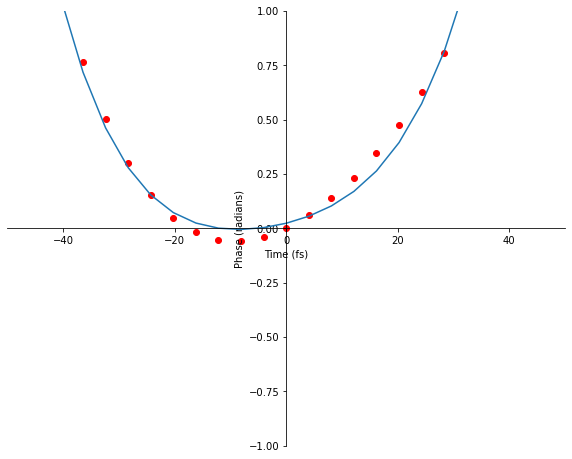

In [86]:
delay_index = 200
x = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.array([phase_data1_45[i][delay_index] for i in range(len(phase_data1_45.axes[1]))])
y1 = y[np.logical_and(x>=-50, x<=50)]

param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-50,50])
plt.ylim([-1,1])
plt.show()

[-3.38814534e-03 -1.50962032e-02  2.48360002e-04  1.28907915e-06
  1.92054256e-09]


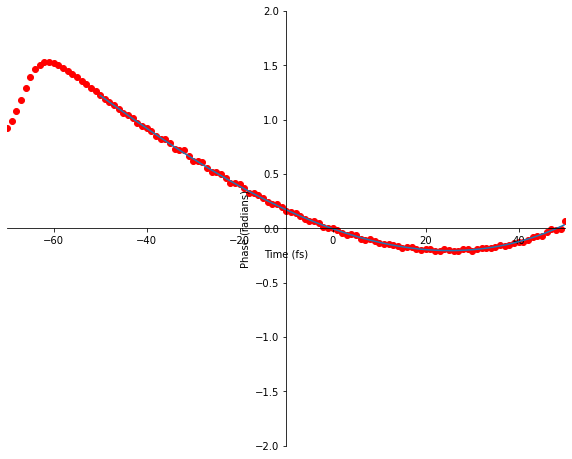

In [87]:
delay_index = 10
x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
y1 = y[delaytime_range]


param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,50])
plt.ylim([-2,2])
plt.savefig("phase.png")
plt.show()

[ 1.39071109e-04 -1.17424405e-03  6.93499625e-05  2.40954296e-07
  3.38175600e-08]


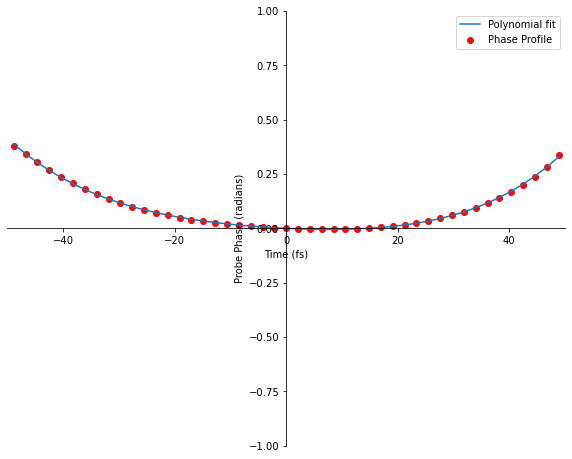

In [90]:
x = probe_data[:][0]
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.unwrap(probe_data[:][2])
y1 = y[np.logical_and(x>=-50, x<=50)]

probe_param, probe_param_cov = curve_fit(phase_fun, x1, y1)
print(probe_param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, probe_param[0], probe_param[1], probe_param[2], probe_param[3], probe_param[4]) for t in x1])
plt.legend(['Polynomial fit', 'Phase Profile'])
plt.xlabel("Time (fs)")
plt.ylabel("Probe Phase (radians)")
plt.xlim([-50,50])
plt.ylim([-1,1])
plt.show()

In [91]:
delaytime_array = np.array(delaytime_data)[0] #Reverses the array as it was not sorted
x = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
delaytime_range = np.logical_and(x>=-50, x<=50)

b_parameter = np.zeros(len(delaytime_array))
c_parameter = np.zeros(len(delaytime_array))
for delay_i in range(len(delaytime_array)):
    x1 = x[delaytime_range]

    y = np.array([phase_data1_45[i][delay_i] for i in range(len(phase_data1_45.axes[1]))])
    y1 = y[delaytime_range]
    
    E_data_delay = np.array([E_data1_45[i][delay_i] for i in range(len(E_data1_45.axes[1]))])
    param, param_cov = curve_fit(phase_fun, x1, y1)
    b_parameter[delay_i] = param[2]
    c_parameter[delay_i] = param[3]

In [92]:
theory_b_parameter = np.zeros(len(theory_df.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df.axes[1])-1)
for delay_index in range(len(theory_df.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    x1 = x[np.logical_and(x>=-50, x<=50)]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[np.logical_and(x>=-50, x<=50)]
    
    theory_param, theory_param_cov = curve_fit(phase_fun, x1, y1)
    theory_b_parameter[delay_index] = theory_param[2]
    theory_c_parameter[delay_index] = theory_param[3]

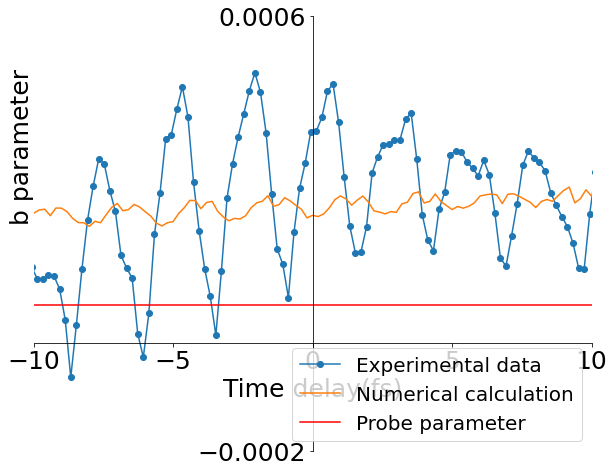

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, b_parameter, '-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_parameter,'-')
plt.axhline(y=probe_param[2], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0006, 0.0006])
# plt.savefig("phase.png")
plt.show()

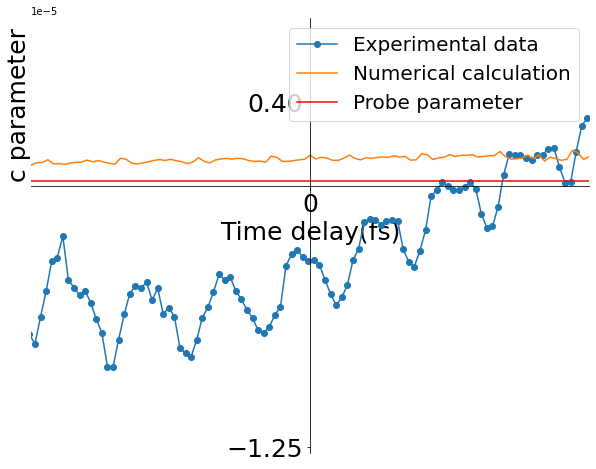

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, c_parameter,'-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_parameter, '-')
plt.axhline(y=probe_param[3], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase.png")
plt.show()

## Least square fitting

In [27]:
import lmfit

In [28]:
model = lmfit.models.ExpressionModel("phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4")

{'phi_0': 7.4298022975911e-05, 'a': -0.0010726129606505443, 'b': 6.978583103652299e-05, 'c': 1.5361955466615903e-07, 'd': 3.347014254920841e-08}


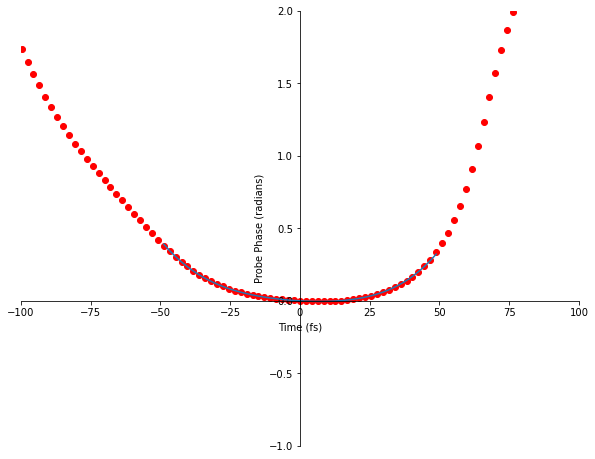

In [29]:
x = probe_data[:][0]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(probe_data[:][2])
y1 = y[delaytime_range]

probe_param = model.fit(y1, weights=(probe_data[:][1])[delaytime_range]/np.max(probe_data[:][1]), x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
print(probe_param.best_values)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x, y, color='red')
plt.plot(x1, probe_param.best_fit)
plt.xlabel("Time (fs)")
plt.ylabel("Probe Phase (radians)")
plt.xlim([-100,100])
plt.ylim([-1,2])
plt.show()

In [30]:
delaytime_array = np.array(delaytime_data)[0] 
time = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
delaytime_range = np.logical_and(time>=-50, time<=50)

b_parameter = np.zeros(len(delaytime_array))
c_parameter = np.zeros(len(delaytime_array))
for delay_i in range(len(delaytime_array)):
    x1 = time[delaytime_range]

    y = np.array([phase_data1_45[i][delay_i] for i in range(len(phase_data1_45.axes[1]))])
    y1 = y[delaytime_range]
    
    E_data_delay = np.array([E_data1_45[i][delay_i] for i in range(len(E_data1_45.axes[1]))])
    param = model.fit(y1, weights=(E_data_delay/max(E_data_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
    b_parameter[delay_i] = param.best_values['b']
    c_parameter[delay_i] = param.best_values['c']

In [31]:
theory_b_parameter = np.zeros(len(theory_df.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df.axes[1])-1)
for delay_index in range(len(theory_df.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    delaytime_range = np.logical_and(x>=-50, x<=50)
    x1 = x[delaytime_range]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[delaytime_range]
    
    theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
    theory_param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
    theory_b_parameter[delay_index] = theory_param.best_values['b']
    theory_c_parameter[delay_index] = theory_param.best_values['c']

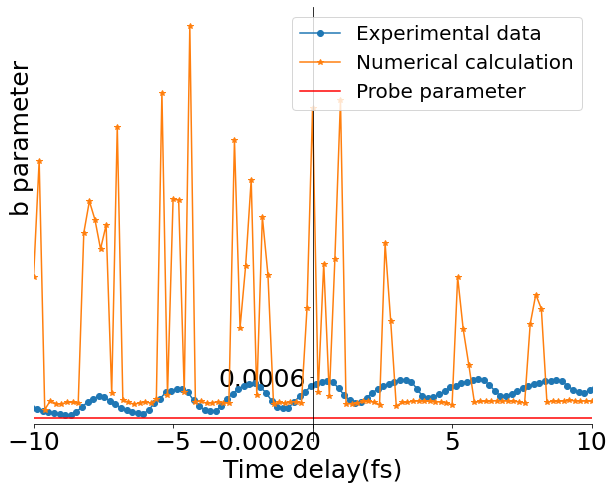

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, b_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_b_parameter, '-*')
plt.axhline(y=probe_param.best_values['b'], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0009, 0.0015])
# plt.savefig("phase.png")
plt.show()

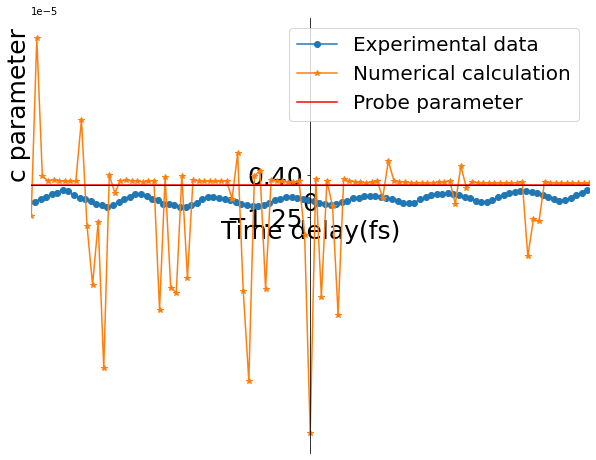

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, c_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_c_parameter, '-*')
plt.axhline(y=probe_param.best_values['c'], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase
#plt.ylim([-0.000025, 0.000015])
# plt.savefig("phase.png")
plt.show()

# Filtering Higher Harmonics

## Time and Delay time Data

In [30]:

time_data = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/Time.txt", header=None, sep='\t')
delaytime_data = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/Time_Delay.txt", header=None, sep='\t')
display(time_data)
display(delaytime_data)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,-801.025877,-796.980292,-792.934707,-788.889121,-784.843536,-780.797951,-776.752366,-772.70678,-768.661195,-764.61561,...,461.196717,465.242302,469.287888,473.333473,477.379058,481.424643,485.470229,489.515814,493.561399,497.606984


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,53.33328,53.13328,52.93328,52.733281,52.533281,52.333281,52.133281,51.933281,51.733282,51.533282,...,-24.866642,-25.066642,-25.266641,-25.466641,-25.666641,-25.866641,-26.066641,-26.26664,-26.46664,-26.66664


In [36]:
# theory_df = pd.read_csv('../more_delay/MgO_moredelay.csv', header=None)
theory_df00 = pd.read_csv('./I_0/datafile_high_intensity.csv', header=None)
theory_df01 = pd.read_csv('./I_0/kx_0_ky_1/datafile.csv', header=None)
theory_df02 = pd.read_csv('./I_0/kx_0_ky_2/datafile.csv', header=None)
theory_df03 = pd.read_csv('./I_0/kx_0_ky_3/datafile.csv', header=None)
theory_df04 = pd.read_csv('./I_0/kx_0_ky_4/datafile.csv', header=None)
theory_df05 = pd.read_csv('./I_0/kx_0_ky_5/datafile.csv', header=None)
# theory_df10 = pd.read_csv('./I_0/kx_1_ky_0/datafile.csv', header=None)
theory_df20 = pd.read_csv('./I_0/kx_2_ky_0/datafile.csv', header=None)
theory_df30 = pd.read_csv('./I_0/kx_3_ky_0/datafile.csv', header=None)
theory_df40 = pd.read_csv('./I_0/kx_4_ky_0/datafile.csv', header=None)
theory_df50 = pd.read_csv('./I_0/kx_5_ky_0/datafile.csv', header=None)
theory_df11 = pd.read_csv('./I_0/kx_1_ky_1/datafile.csv', header=None)
theory_df22 = pd.read_csv('./I_0/kx_2_ky_2/datafile.csv', header=None)
theory_df33 = pd.read_csv('./I_0/kx_3_ky_3/datafile.csv', header=None)
theory_df44 = pd.read_csv('./I_0/kx_4_ky_4/datafile.csv', header=None)
theory_df55 = pd.read_csv('./I_0/kx_5_ky_5/datafile.csv', header=None)
display(theory_df.shape)
display(theory_df01.shape)
display(theory_df02.shape)
display(theory_df03.shape)
display(theory_df04.shape)
display(theory_df05.shape)
display(theory_df20.shape)
display(theory_df30.shape)
display(theory_df40.shape)
display(theory_df50.shape)
display(theory_df11.shape)
display(theory_df22.shape)
display(theory_df33.shape)
display(theory_df44.shape)
display(theory_df55.shape)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

In [37]:
print(len(theory_df.axes[0]))

301


In [38]:
def band_filter(x):
    ar = []
    for i in x:
        if i >= 0.3 and i <=0.5:
            ar.append(1)
        else:
            ar.append(0)
    return np.array(ar)

In [39]:
from numpy.fft import fft, fftfreq, ifft
def filter_data(time, data):
    filtered_data = []
    w0 = 2.35
    for j in range(data.shape[1]):
        signal = data[:,j]*np.exp(1j*w0*time)
        signal_fft = fft(signal)
        x_freq = fftfreq(len(time), d=1)
        filter_signal = signal_fft * band_filter(x_freq)
        filtered_data.append(ifft(filter_signal)*np.exp(-1j*w0*time))
    return np.transpose(np.array(filtered_data))

In [40]:
def convert_to_complex(df, i, j):
    return complex((df[j][i][:-2] + 'j').replace("*^","e"))

In [41]:
theory_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1])), dtype=complex)
for i in range(len(theory_df00.axes[0])):
    theory_data[i][0] = theory_df[0][i]
    for j in range(1, len(theory_df00.axes[1])):
        # theory_data[i][j] = (convert_to_complex(theory_df00, i, j))
        theory_data[i][j] = 0
        for index in range(0, 1):
            theory_data[i][j] += convert_to_complex(eval("theory_df0" + str(index)), i, j)

w0 = 2.35
e_data = 1j*w0*theory_data[:, 1:]
e_data = filter_data(theory_df00.iloc[:,0], e_data)

In [11]:
# np.savetxt('E_filtered_data.csv', e_data, delimiter=',')

In [42]:
abs_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1]-1)))
arg_data = np.zeros((len(theory_df00.axes[0]), len(theory_df00.axes[1]-1)))
for i in range(len(theory_df00.axes[0])):
    for j in range(len(theory_df00.axes[1])-1):
        (abs_data[i,j], arg_data[i,j]) = cmath.polar(e_data[i,j]) 

In [43]:
def max_E_index(i):
    return max(range(len(abs_data[:,i])), key = abs_data[:,i].__getitem__)

## Intensity Data

In [44]:
E_data1_45 = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/E_t_Amp_Avg.txt", header=None, sep='\t')
display(E_data1_45)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,697.649599,617.843719,516.262331,435.867470,384.078003,347.913588,383.179514,468.293695,573.202544,669.225789,...,1350.000142,1456.518575,1537.206886,1595.730369,1633.837388,1653.406542,1657.102578,1650.849940,1648.317718,1661.189842
1,601.895814,566.245857,518.220281,464.532441,435.909556,488.764853,563.284877,620.405436,645.675964,640.378591,...,1406.340615,1519.469134,1590.822046,1627.878162,1643.719948,1654.152284,1675.114159,1719.244686,1790.617507,1879.848704
2,738.291050,618.534069,488.567079,445.732611,489.741341,545.907614,614.616304,667.711877,678.112465,672.086529,...,841.765828,975.464064,1097.203201,1212.282317,1310.017415,1386.951144,1449.922389,1508.319888,1570.962903,1643.409291
3,694.835388,662.032858,643.421795,653.289580,688.001732,707.967049,711.904246,734.066199,759.523546,745.900722,...,1170.621731,1225.285529,1241.154307,1243.289208,1257.335975,1297.795270,1349.587602,1377.706979,1373.683341,1350.786169
4,658.224816,580.341559,517.167586,516.502117,558.019405,586.133654,599.434895,610.274008,628.020371,646.512541,...,890.314668,927.640490,906.103321,844.788188,785.792851,752.224797,735.045377,718.955843,692.873681,664.499842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,649.104802,687.977087,716.992355,735.372993,753.323712,770.387637,782.710507,787.985607,780.986322,763.447570,...,927.414571,866.334624,837.379476,828.005740,826.840950,825.728568,820.467694,916.450823,1009.321910,1085.627001
397,753.775456,778.832828,776.922239,767.123848,768.026547,765.980968,755.545068,736.279441,728.137002,748.193731,...,1617.222403,1707.600026,1805.041331,1892.533042,1966.563642,2028.609612,2081.548308,2127.076390,2164.716079,2191.368693
398,651.140509,663.227832,741.079650,833.763376,917.264166,980.944634,1016.557913,1016.098550,979.805651,916.874462,...,1999.821337,2087.019434,2168.437117,2242.080124,2306.403247,2361.271377,2408.929665,2453.780242,2500.298046,2549.255200
399,889.108707,943.693449,983.385349,1008.669401,1035.248513,1059.779003,1066.848865,1052.396052,1017.244431,968.627269,...,2521.742959,2615.840017,2685.980081,2733.240225,2759.442923,2766.622822,2756.180368,2727.678852,2678.049397,2602.242338


In [45]:
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
print(max(range(len(E_data_delay)), key = E_data_delay.__getitem__))

summed_abs_data = np.zeros(len(theory_df00.axes[1])-1)
for i in range(len(theory_df00.axes[1])-1):
    summed_abs_data[i] = np.sum(abs_data[:,i])

print(max(range(len(summed_abs_data)), key = summed_abs_data.__getitem__))

170
3


In [16]:
print(delaytime_data.values[:,267])
print(np.arange(30,-31,-1)[30])

[-0.066667]
0


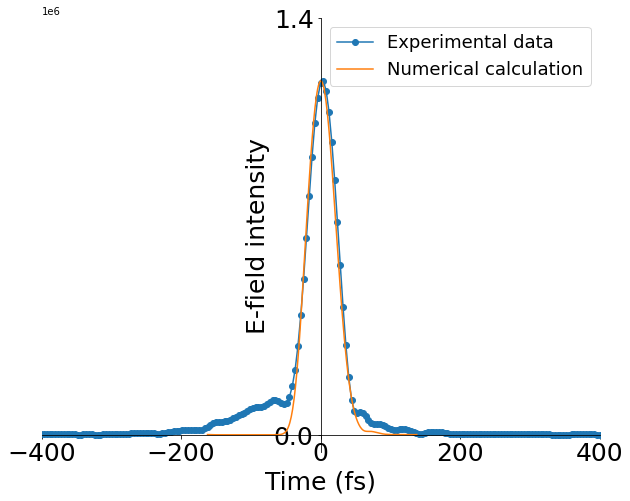

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


delay_index = 267 # Index where time_delay is near 0
theory_delay_index = 50
correction_factor = max([E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))])/max(abs_data[:,theory_delay_index])

plt.plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))], '-o')
plt.plot(theory_data[:,0].real - theory_data[:,0].real[max_E_index(theory_delay_index)], correction_factor*abs_data[:,theory_delay_index]) 
#Maxinmum value of E shifted to t=0
plt.legend(['Experimental data', 'Numerical calculation'],fontsize=18)
plt.xlabel("Time (fs)", fontsize=25)
plt.ylabel("E-field intensity", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([0, 1.4*(10**6)])
plt.xlim([-400,400])
plt.show()

In [ ]:
# # print(np.arange(-150,150, 1)[100:701])
# summed_E_data_10 = np.zeros(len(theory_df.axes[1])-1)
# for i in range(len(theory_df.axes[1])-1):
#     summed_E_data_10[i] = np.sum(abs_data[100:701,i])

# # print(max(range(len(summed_E_data)), key = summed_E_data.__getitem__))
# # print(summed_E_data[19])
# # print(np.arange(210,-200,-10)[19])
# # print(summed_E_data[20])

In [48]:
def correction_factor(theory, exp):
    return np.mean(exp)/np.mean(theory)

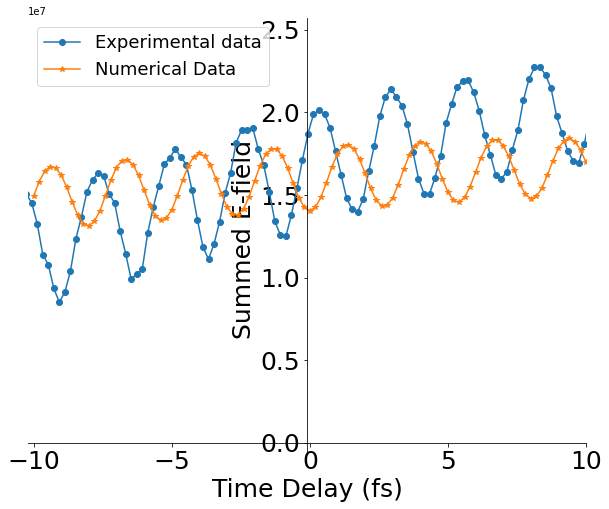

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs_data, E_data_delay)*summed_abs_data,"-*")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.legend(['Experimental data', 'Numerical Data'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

## Phase Data

In [50]:
phase_data1_45 = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/E_t_Phase_Avg.txt", header=None, sep='\t')
display(phase_data1_45)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,4.841584,4.890753,4.970150,5.019605,5.118449,5.216049,5.439065,5.340410,5.278911,5.327447,...,12.398283,12.566238,12.748619,12.943448,13.150333,13.369252,13.600892,13.850375,14.119608,14.384484
1,-0.148239,-0.194996,-0.202665,-0.082619,0.089137,0.139359,0.203582,0.268221,0.372152,0.543262,...,8.763271,8.924777,9.090705,9.270876,9.470527,9.690989,9.930632,10.183464,10.433775,10.661044
2,3.588963,3.523746,3.492707,3.692107,3.933738,4.211403,4.558374,4.722541,4.810278,4.876170,...,3.314977,3.425332,3.596544,3.779993,3.934587,4.075551,4.213589,4.350507,4.486045,4.618184
3,12.173181,12.211591,12.296403,12.302655,12.231121,12.242935,12.332409,12.168098,12.185019,12.243777,...,2.158649,2.225566,2.330700,2.481583,2.676422,2.911378,3.074573,3.166492,3.232395,3.295408
4,16.494421,16.484357,16.421835,16.200284,16.204162,16.283988,16.383824,16.478386,16.552826,16.607546,...,1.684194,1.694519,1.733648,1.833524,2.019538,2.175284,2.296397,2.360089,2.375085,2.123306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,6.743724,6.834429,6.889913,6.952439,7.065999,7.091291,7.061026,7.004198,6.959233,6.929459,...,7.652756,7.637673,7.667353,7.697476,7.700534,7.700331,7.778312,7.648768,7.612054,7.610226
397,1.405209,1.406104,1.427357,1.506583,1.527720,1.488123,1.444950,1.478813,1.674894,1.743755,...,2.604190,2.730580,2.793293,2.843611,2.896935,2.955527,3.016485,3.075532,3.129563,3.176134
398,4.389503,4.572239,4.612939,4.572377,4.485291,4.365735,4.244009,4.135870,4.043086,3.967729,...,-1.633881,-1.623236,-1.596991,-1.558765,-1.511449,-1.456683,-1.395211,-1.327879,-1.256989,-1.187084
399,4.317672,4.192745,4.073438,3.997938,4.009091,3.916573,3.805940,3.710167,3.639558,3.598629,...,-2.922530,-2.933313,-2.928566,-2.910563,-2.881581,-2.843960,-2.800293,-2.753396,-2.705651,-2.658038


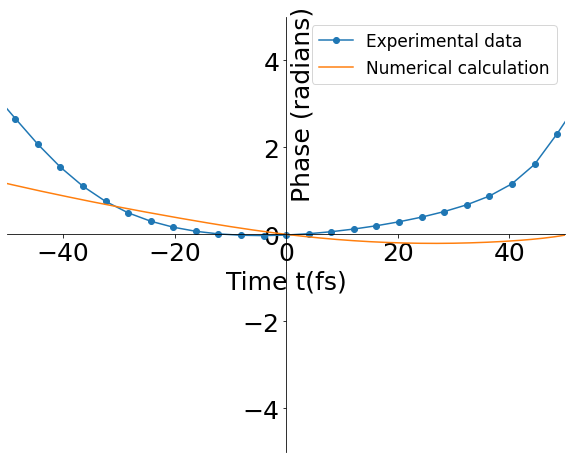

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = probe_data[:][0]
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.unwrap(probe_data[:][2])
delay_index = 267
theory_delay_index = 50

x = theory_data[:,0].real
plt.plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [phase_data1_45[i][delay_index] for i in range(len(phase_data1_45.axes[1]))], '-o')
plt.plot(x - x[max_E_index(theory_delay_index)], np.unwrap(arg_data[:,theory_delay_index]) - np.unwrap(arg_data[:,theory_delay_index])[max_E_index(theory_delay_index)])
# plt.plot(probe_data[:][0], np.unwrap(probe_data[:][2]), '-*')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe phase'], fontsize=17)
plt.xlabel("Time t(fs)", fontsize=25)
plt.ylabel("Phase (radians)", fontsize=25)
ax.yaxis.set_label_coords(0.55,0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# ax.set_yticks([0, 1.4*(10**6)])
plt.ylim([-5,5])
plt.xlim([-50,50])
plt.show()

### Curve fitting of Phase Data

In [63]:
def phase_fun(t, phi_0, a, b, c, d):
    return phi_0 + a*t + b*(t)**2 + c*(t)**3 + d*(t)**4
# def phase_fun(t, phi_0, t0, b, c, d):
#     return phi_0 + b*(t-t0)**2 + c*(t-t0)**3 + d*(t-t0)**4

[2.34734103e-02 6.41428098e-03 3.68670497e-04 3.78438277e-06
 3.53841867e-07]


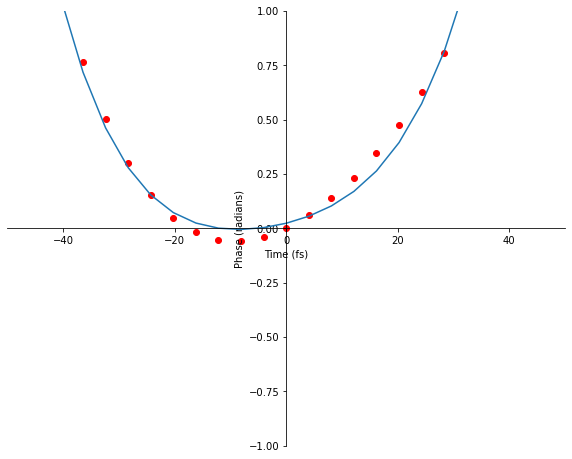

In [64]:
delay_index = 200
x = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.array([phase_data1_45[i][delay_index] for i in range(len(phase_data1_45.axes[1]))])
y1 = y[np.logical_and(x>=-50, x<=50)]

param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-50,50])
plt.ylim([-1,1])
plt.show()

[ 3.55464318e-03 -1.36907925e-02  2.55150418e-04  1.42535852e-06
  5.09317750e-09]


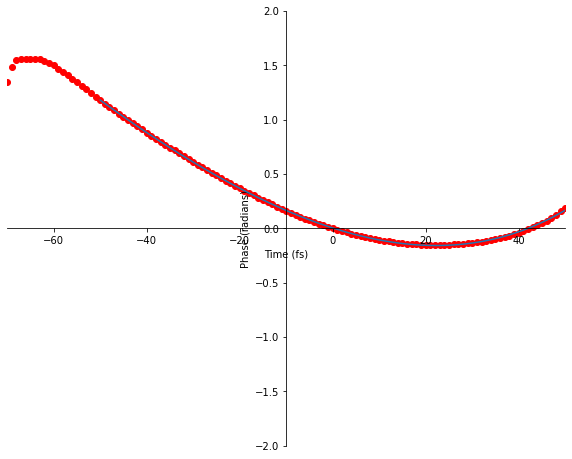

In [66]:
delay_index = 10
x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
y1 = y[delaytime_range]


param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,50])
plt.ylim([-2,2])
# plt.savefig("phase.png")
plt.show()

[ 1.39071109e-04 -1.17424405e-03  6.93499625e-05  2.40954296e-07
  3.38175600e-08]


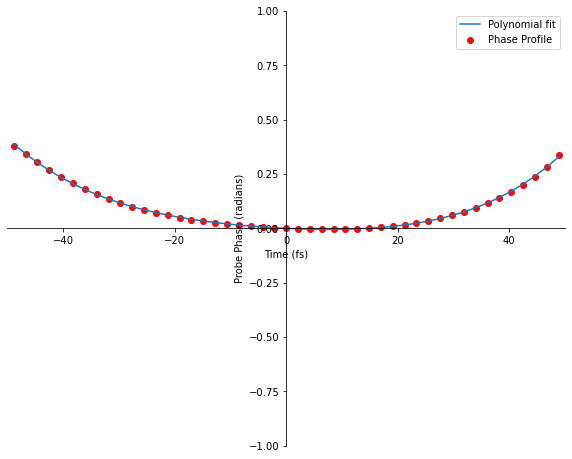

In [73]:
x = probe_data[:][0]
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.unwrap(probe_data[:][2])
y1 = y[np.logical_and(x>=-50, x<=50)]

probe_param, probe_param_cov = curve_fit(phase_fun, x1, y1)
print(probe_param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, probe_param[0], probe_param[1], probe_param[2], probe_param[3], probe_param[4]) for t in x1])
plt.legend(['Polynomial fit', 'Phase Profile'])
plt.xlabel("Time (fs)")
plt.ylabel("Probe Phase (radians)")
plt.xlim([-50,50])
plt.ylim([-1,1])
plt.show()

In [74]:
delaytime_array = np.array(delaytime_data)[0] #Reverses the array as it was not sorted
x = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
delaytime_range = np.logical_and(x>=-50, x<=50)

b_parameter = np.zeros(len(delaytime_array))
c_parameter = np.zeros(len(delaytime_array))
for delay_i in range(len(delaytime_array)):
    x1 = x[delaytime_range]

    y = np.array([phase_data1_45[i][delay_i] for i in range(len(phase_data1_45.axes[1]))])
    y1 = y[delaytime_range]
    
    E_data_delay = np.array([E_data1_45[i][delay_i] for i in range(len(E_data1_45.axes[1]))])
    param, param_cov = curve_fit(phase_fun, x1, y1)
    b_parameter[delay_i] = param[2]
    c_parameter[delay_i] = param[3]

In [75]:
theory_b_parameter = np.zeros(len(theory_df.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df.axes[1])-1)
for delay_index in range(len(theory_df.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    x1 = x[np.logical_and(x>=-50, x<=50)]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[np.logical_and(x>=-50, x<=50)]
    
    theory_param, theory_param_cov = curve_fit(phase_fun, x1, y1)
    theory_b_parameter[delay_index] = theory_param[2]
    theory_c_parameter[delay_index] = theory_param[3]

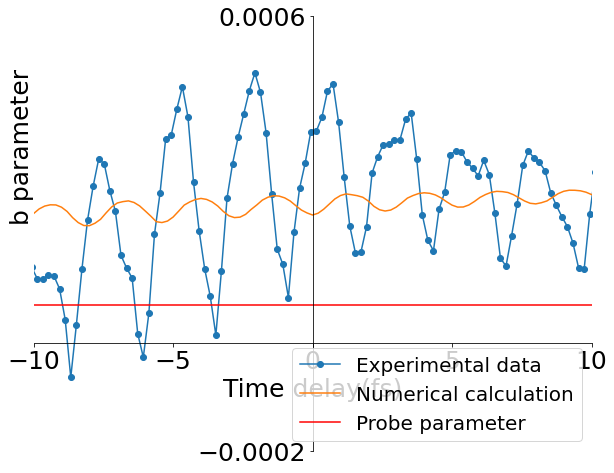

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, b_parameter, '-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_parameter,'-')
plt.axhline(y=probe_param[2], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0006, 0.0006])
# plt.savefig("phase.png")
plt.show()

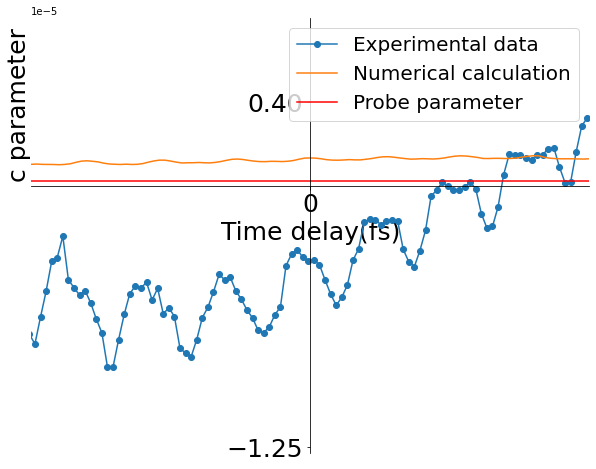

In [77]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, c_parameter,'-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_parameter, '-')
plt.axhline(y=probe_param[3], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase.png")
plt.show()

## Least square fitting

In [52]:
import lmfit

In [53]:
def phase_fun(x, phi_0, a, b, c, d):
    return phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4

In [54]:
# model = lmfit.models.ExpressionModel("phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4")
model = lmfit.Model(phase_fun)

In [55]:
np.arange(10, -10.2, -0.2)[50]

3.552713678800501e-14

{'phi_0': 7.4298022975911e-05, 'a': -0.0010726129606505443, 'b': 6.978583103652299e-05, 'c': 1.5361955466615903e-07, 'd': 3.347014254920841e-08}


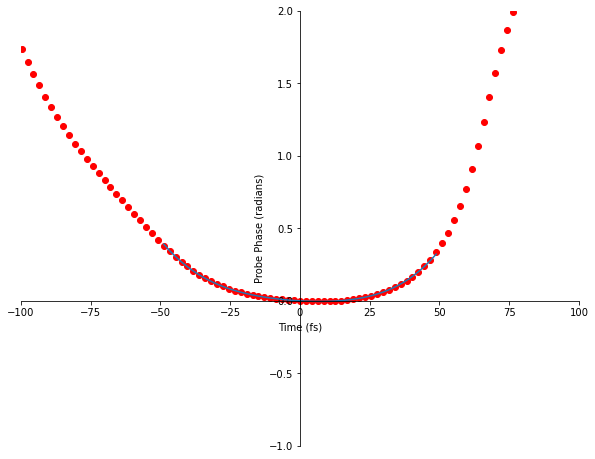

In [59]:
x = probe_data[:][0]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(probe_data[:][2])
y1 = y[delaytime_range]

probe_param = model.fit(y1, weights=(probe_data[:][1])[delaytime_range]/np.max(probe_data[:][1]), x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
print(probe_param.best_values)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x, y, color='red')
plt.plot(x1, probe_param.best_fit)
plt.xlabel("Time (fs)")
plt.ylabel("Probe Phase (radians)")
plt.xlim([-100,100])
plt.ylim([-1,2])
plt.show()

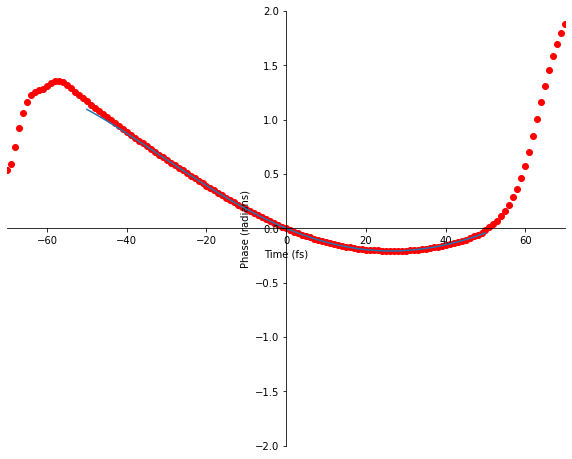

In [56]:
delay_index = 50
x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
y1 = y[delaytime_range]


theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
# theory_b_parameter[delay_index] = theory_param.best_values['b']
# theory_c_parameter[delay_index] = theory_param.best_values['c']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param.best_values['phi_0'], param.best_values['a'], param.best_values['b'], param.best_values['c'], param.best_values['d']) for t in x1])
# plt.plot(x1, param.eval(x=x1))
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,70])
plt.ylim([-2,2])
# plt.savefig("phase.png")
plt.show()

In [60]:
theory_b_parameter = np.zeros(len(theory_df00.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df00.axes[1])-1)
for delay_index in range(len(theory_df00.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    delaytime_range = np.logical_and(x>=-50, x<=50)
    x1 = x[delaytime_range]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[delaytime_range]
    
    theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
    theory_param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
    theory_b_parameter[delay_index] = theory_param.best_values['b']
    theory_c_parameter[delay_index] = theory_param.best_values['c']

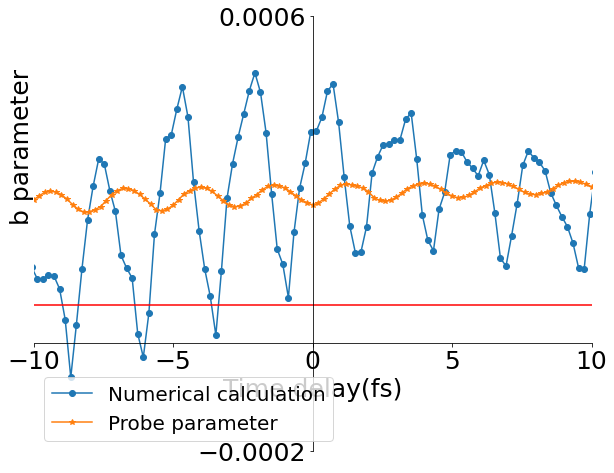

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, b_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_b_parameter, '-*')
plt.axhline(y=probe_param.best_values['b'], color='r', linestyle='-')
plt.legend(['Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0009, 0.0015])
# plt.savefig("phase.png")
plt.show()

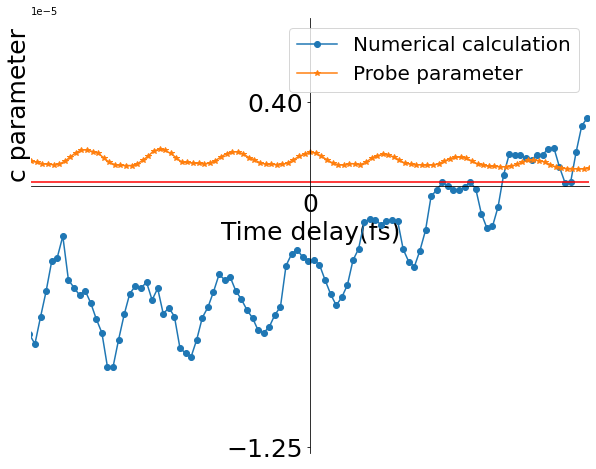

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, c_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_c_parameter, '-*')
plt.axhline(y=probe_param.best_values['c'], color='r', linestyle='-')
plt.legend(['Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase
#plt.ylim([-0.000025, 0.000015])
# plt.savefig("phase.png")
plt.show()